# Multiclass Classification with Neural Nets via sklearn

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [3]:
from sklearn.model_selection import train_test_split

#Temporarily reduce the training set to speed up execution while testing...
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.15)
print('X_train size :', X_train.shape)


ImportError: No module named 'sklearn.model_selection'

## A size of 500 seems better that 2500 (and it is faster...). overfitting ???

In [72]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=250, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

#notes :
#layersize = 100, max_iter = 50  ==> 0.87 / 0.87 (train/test)
#layersize = 100, max_iter = 100  ==> 0.93 / 0.92 (train/test)
#layersize = 500, max_iter = 250  ==> 1.00 / 0.97 (train/test)


ImportError: cannot import name 'MLPClassifier'

In [73]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=250, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [74]:
print('Training score: ', mlp.score(X_train, y_train))
print('Test score: ', mlp.score(X_test, y_test))

Training score:  1.0
Test score:  0.968952380952


**** WRONG ****
proba img :  [[  1.20817954e-13   1.18666378e-09   9.75965728e-20   3.81278731e-03
    1.75695763e-14   1.45324605e-06   7.94199962e-43   5.05727826e-01
    4.90454676e-01   3.25600833e-06]]
guessed: 7


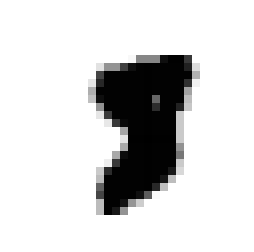

***************
**** WRONG ****
proba img :  [[  2.32593018e-44   4.58103886e-21   9.99999973e-01   2.73103513e-08
    4.91865012e-54   1.66117764e-23   3.88002476e-42   1.51580560e-29
    1.01425479e-12   3.07943130e-29]]
guessed: 2


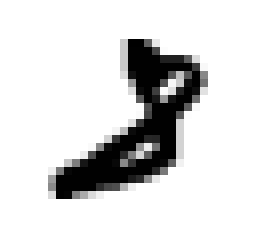

***************
**** WRONG ****
proba img :  [[  5.63158860e-21   3.44930862e-46   2.65556664e-10   1.47825465e-20
    2.75692355e-14   4.64020980e-13   1.47527320e-33   2.54644978e-33
    1.01549462e-01   8.98450538e-01]]
guessed: 9


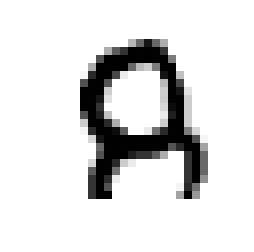

***************
**** WRONG ****
proba img :  [[  1.48202261e-11   3.17526957e-78   1.88494218e-12   7.75549346e-10
    3.19304985e-25   5.73341201e-34   9.14592576e-46   2.23771738e-33
    2.91663029e-17   9.99999999e-01]]
guessed: 9


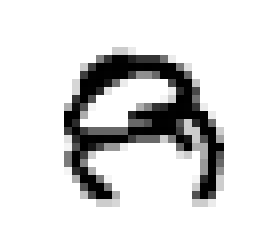

***************
**** WRONG ****
proba img :  [[  1.20817954e-13   1.18666378e-09   9.75965728e-20   3.81278731e-03
    1.75695763e-14   1.45324605e-06   7.94199962e-43   5.05727826e-01
    4.90454676e-01   3.25600833e-06]]
guessed: 7


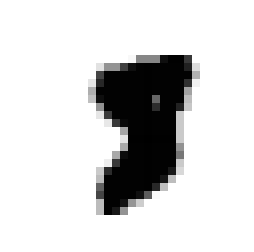

***************
**** WRONG ****
proba img :  [[  2.32593018e-44   4.58103886e-21   9.99999973e-01   2.73103513e-08
    4.91865012e-54   1.66117764e-23   3.88002476e-42   1.51580560e-29
    1.01425479e-12   3.07943130e-29]]
guessed: 2


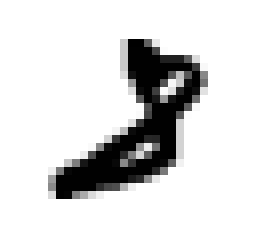

***************
**** WRONG ****
proba img :  [[  1.48202261e-11   3.17526957e-78   1.88494218e-12   7.75549346e-10
    3.19304985e-25   5.73341201e-34   9.14592576e-46   2.23771738e-33
    2.91663029e-17   9.99999999e-01]]
guessed: 9


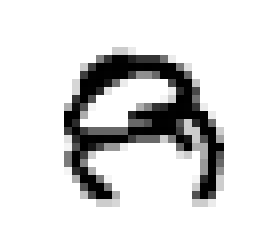

***************
guessed percentage: 0.993


In [75]:
def getRandomDigitFrom(n):
    r = np.random.randint(0,1000)
    img = mnist.data[3000+n*6000+r].reshape(28,28)    
    return img

#iterate until something wrong is found
digit_to_find = 8
errors = 0
nb_tests = 1000
for i in range(nb_tests):
    img = getRandomDigitFrom(digit_to_find)
    img = img.reshape(1,-1)
    proba_img = mlp.predict_proba(img)
    guessed = np.argmax(proba_img)
    if ( guessed != digit_to_find):
        errors = errors + 1
        print('**** WRONG ****')
        print('proba img : ', proba_img)
        print('guessed:', guessed)
        img = img.reshape(28,28)
        plt.axis('off')
        plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        print('***************')
        
print('guessed percentage:', (nb_tests-errors)/nb_tests)



In [34]:
### From scikit-learn documentation... odd result...

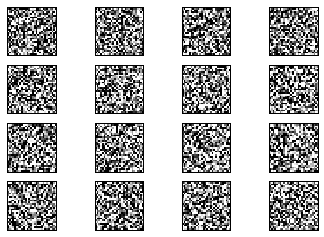

In [35]:

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()